### Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

### Objective

<ol>
    <li> Explore and visualize the dataset.</li>
    <li> Build a classification model to predict if the customer is going to churn or not</li>
    <li> Optimize the model using appropriate techniques</li>
    <li> Generate a set of insights and recommendations that will help the bank</li>
</ol>

### Data Dictionary

<ul>
    <li> CLIENTNUM: Client number. Unique identifier for the customer holding the account </li>
    <li> Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0 </li>
    <li> Customer_Age: Age in Years </li>
    <li> Gender: Gender of the account holder </li>
    <li> Dependent_count: Number of dependents </li>
    <li> Education_Level: Educational Qualification of the account holder </li>
    <li> Marital_Status: Marital Status of the account holder </li>
    <li> Income_Category: Annual Income Category of the account holder </li>
    <li> Card_Category: Type of Card</li>
    <li> Months_on_book: Period of relationship with the bank</li>
    <li> Total_Relationship_Count: Total no. of products held by the customer</li>
    <li> Months_Inactive_12_mon: No. of months inactive in the last 12 months </li>
    <li> Contacts_Count_12_mon: No. of Contacts in the last 12 months</li>
    <li> Credit_Limit: Credit Limit on the Credit Card </li>
    <li> Total_Revolving_Bal: Total Revolving Balance on the Credit Card</li>
    <li> Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)</li>
    <li> Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)</li>
    <li> Total_Trans_Amt: Total Transaction Amount (Last 12 months)</li>
    <li> Total_Trans_Ct: Total Transaction Count (Last 12 months)</li>
    <li> Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)</li>
    <li> Avg_Utilization_Ratio: Average Card Utilization Ratio</li>
</ul>


In [1]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier, 
    StackingClassifier,
)
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline, make_pipeline


ModuleNotFoundError: No module named 'seaborn'

In [2]:
data = pd.read_csv("BankChurners.csv")

df = data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

### Insight:

Customer Age - The data suggests we are dealing with adults only. With a minimum age of 26.

Months_on_book - All customers in dataset have been with the bank longer than a year

All of the data related to dollar mounts (Credit Limit, Total Revolving Balance etc.) have wide ranges of values with low minimums and very high maximum values.

The categorical variables are as follows:
Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category

Total_Relationship_Count, Dependent_count and Contacts_Count_12_mon will be converted to a categorical value, as they represent values that are not continous.



In [5]:
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   
5              36  ...                       1                      2   
6              46  ...                       1                      3   
7              27  ...                       2                      2   
8              36  ...                       2                      0   
9              36  ...                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  0.048  
8             1350              24                1.182              

In [6]:
df.tail(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10119  716893683  Attrited Customer            55      F                3   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10117        Graduate        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10119      Uneducated         Single         Unknown          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10117              40  ...                       3                      4   
10118              36  ...                       3                      4   
10119              47  ...                       3                      3   
10120              34  ...                       2                      0   
10121              50  ...                       1                      4   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10117       17925.0                 1909          16016.0   
10118        9959.0                  952           9007.0   
10119       14657.0                 2517          12140.0   
10120       13940.0                 2109          11831.0   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117                 0.712            17498             111   
10118                 0.825            10310              63   
10119                 0.166             6009              53   
10120                 0.660            15577             114   
10121                 0.570            14596             120   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10117                0.820                  0.106  
10118                1.100                  0.096  
10119  

In [7]:
df.shape

(10127, 21)

In [8]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [9]:
df.isnull().values.any()

False

### Insight:

There appears to be no missing values however, there are "Unknown" entries, these will be addressed where possible. Additional investigation will be done to identify possible data concerns.

In [10]:
#Dropping CLIENTNUM before continuing with the EDA.
df.drop(columns=["CLIENTNUM"], inplace=True)

In [11]:
#Investigating the categorical variables
#Making a list of all categorical variables, excluding continous variables that are yet to be encoded
categorical = [
    "Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category",
]

# Printing number of count of each unique value in each column
for column in categorical:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


In [12]:
#I want to check whether the "0" values found in the continous variables are indeed 0, 
#or whether they represent missing values

dfIC = df.loc[df['Income_Category'] == "NaN"]

dfIC.describe().T

count  mean  std  min  25%  50%  75%  max
Customer_Age                0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Dependent_count             0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Months_on_book              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_Relationship_Count    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Months_Inactive_12_mon      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Contacts_Count_12_mon       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Credit_Limit                0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_Revolving_Bal         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Avg_Open_To_Buy             0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_Amt_Chng_Q4_Q1        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_Trans_Amt             0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_Trans_Ct              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_Ct_Chng_Q4_Q1         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Avg_Utilization_Ratio       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [13]:
dfEdu = df.loc[df['Education_Level'] == "Unknown"]

dfEdu.describe().T

count         mean          std       min  \
Customer_Age              1519.0    46.428571     7.957479    26.000   
Dependent_count           1519.0     2.361422     1.330344     0.000   
Months_on_book            1519.0    35.859776     7.916691    13.000   
Total_Relationship_Count  1519.0     3.797893     1.589854     1.000   
Months_Inactive_12_mon    1519.0     2.311389     1.032321     0.000   
Contacts_Count_12_mon     1519.0     2.457538     1.123767     0.000   
Credit_Limit              1519.0  8491.798947  9028.635299  1438.300   
Total_Revolving_Bal       1519.0  1160.449638   816.802016     0.000   
Avg_Open_To_Buy           1519.0  7331.349309  8995.376544    14.000   
Total_Amt_Chng_Q4_Q1      1519.0     0.761209     0.214201     0.061   
Total_Trans_Amt           1519.0  4420.053325  3381.976884   615.000   
Total_Trans_Ct            1519.0    64.745885    23.142879    10.000   
Total_Ct_Chng_Q4_Q1       1519.0     0.712616     0.234277     0.028   
Avg_Utilization_Ratio     1519.0     0.276469     0.278704     0.000   

                                25%       50%         75%        max  
Customer_Age                41.0000    47.000     52.0000     67.000  
Dependent_count              1.0000     2.000      3.0000      5.000  
Months_on_book              32.0000    36.000     40.0000     56.000  
Total_Relationship_Count     3.0000     4.000      5.0000      6.000  
Months_Inactive_12_mon       2.0000     2.000      3.0000      6.000  
Contacts_Count_12_mon        2.0000     2.000      3.0000      6.000  
Credit_Limit              2520.5000  4411.000  10709.5000  34516.000  
Total_Revolving_Bal        252.0000  1270.000   1785.0000   2517.000  
Avg_Open_To_Buy           1240.0000  3393.000   9577.0000  34516.000  
Total_Amt_Chng_Q4_Q1         0.6295     0.742      0.8620      2.180  
Total_Trans_Amt           2207.5000  3872.000   4685.0000  18484.000  
Total_Trans_Ct              45.0000    67.000     80.0000    139.000  
Total_Ct_Chng_Q4_Q1          0.5785     0.707      0.8210      2.571  
Avg_Utilization_Ratio        0.0185     0.171      0.5145      0.992

In [14]:
dfMarital = df.loc[df['Marital_Status'] == "Unknown"]

dfMarital.describe().T

count         mean          std       min       25%  \
Customer_Age              749.0    45.568758     6.863617    26.000    42.000   
Dependent_count           749.0     2.538051     1.265632     0.000     2.000   
Months_on_book            749.0    35.189586     7.211573    13.000    32.000   
Total_Relationship_Count  749.0     3.761015     1.626248     1.000     2.000   
Months_Inactive_12_mon    749.0     2.323097     1.039211     1.000     2.000   
Contacts_Count_12_mon     749.0     2.417891     1.064874     0.000     2.000   
Credit_Limit              749.0  9445.283178  9558.351504  1438.300  2699.000   
Total_Revolving_Bal       749.0  1157.748999   825.692109     0.000     0.000   
Avg_Open_To_Buy           749.0  8287.534179  9585.015364   111.000  1438.300   
Total_Amt_Chng_Q4_Q1      749.0     0.749482     0.190963     0.018     0.640   
Total_Trans_Amt           749.0  4720.005340  3304.686020   647.000  2494.000   
Total_Trans_Ct            749.0    67.146862    22.531732    15.000    49.000   
Total_Ct_Chng_Q4_Q1       749.0     0.715356     0.222735     0.077     0.582   
Avg_Utilization_Ratio     749.0     0.255899     0.267568     0.000     0.000   

                               50%        75%        max  
Customer_Age                45.000     49.000     65.000  
Dependent_count              3.000      3.000      5.000  
Months_on_book              36.000     39.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              5222.000  12778.000  34516.000  
Total_Revolving_Bal       1261.000   1793.000   2517.000  
Avg_Open_To_Buy           3983.000  11350.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.734      0.856      2.204  
Total_Trans_Amt           4182.000   4887.000  16732.000  
Total_Trans_Ct              69.000     82.000    131.000  
Total_Ct_Chng_Q4_Q1          0.707      0.815      2.333  
Avg_Utilization_Ratio        0.150      0.470      0.958

In [15]:
#Investigating our target variable Attrition_Flag
dfTarget = df.loc[df['Attrition_Flag'] == "Attrited Customer"]

dfTarget.describe().T

count         mean          std     min        25%  \
Customer_Age              1627.0    46.659496     7.665652    26.0    41.0000   
Dependent_count           1627.0     2.402581     1.275010     0.0     2.0000   
Months_on_book            1627.0    36.178242     7.796548    13.0    32.0000   
Total_Relationship_Count  1627.0     3.279656     1.577782     1.0     2.0000   
Months_Inactive_12_mon    1627.0     2.693301     0.899623     0.0     2.0000   
Contacts_Count_12_mon     1627.0     2.972342     1.090537     0.0     2.0000   
Credit_Limit              1627.0  8136.039459  9095.334105  1438.3  2114.0000   
Total_Revolving_Bal       1627.0   672.822987   921.385582     0.0     0.0000   
Avg_Open_To_Buy           1627.0  7463.216472  9109.208129     3.0  1587.0000   
Total_Amt_Chng_Q4_Q1      1627.0     0.694277     0.214924     0.0     0.5445   
Total_Trans_Amt           1627.0  3095.025814  2308.227629   510.0  1903.5000   
Total_Trans_Ct            1627.0    44.933620    14.568429    10.0    37.0000   
Total_Ct_Chng_Q4_Q1       1627.0     0.554386     0.226854     0.0     0.4000   
Avg_Utilization_Ratio     1627.0     0.162475     0.264458     0.0     0.0000   

                               50%       75%        max  
Customer_Age                47.000    52.000     68.000  
Dependent_count              2.000     3.000      5.000  
Months_on_book              36.000    40.000     56.000  
Total_Relationship_Count     3.000     5.000      6.000  
Months_Inactive_12_mon       3.000     3.000      6.000  
Contacts_Count_12_mon        3.000     4.000      6.000  
Credit_Limit              4178.000  9933.500  34516.000  
Total_Revolving_Bal          0.000  1303.500   2517.000  
Avg_Open_To_Buy           3488.000  9257.500  34516.000  
Total_Amt_Chng_Q4_Q1         0.701     0.856      1.492  
Total_Trans_Amt           2329.000  2772.000  10583.000  
Total_Trans_Ct              43.000    51.000     94.000  
Total_Ct_Chng_Q4_Q1          0.531     0.692      2.500  
Avg_Utilization_Ratio        0.000     0.231      0.999

In [16]:
dfTarget.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   1627      1  Attrited Customer  1627
Gender           1627      2                  F   930
Education_Level  1627      7           Graduate   487
Marital_Status   1627      4            Married   709
Income_Category  1627      6     Less than $40K   612
Card_Category    1627      4               Blue  1519

### Insight:

The initial data investigation would suggest the following.

The most common profile of customers who closed their account is:

<ul>
<li>Gender: Female</li>
<li>Education: Graduate</li>
<li>Marital Status: Married</li>
<li>Income Category: Less than 40k</li>
<li>Card Category: Blue</li>
</ul>

We will explore the outliers and fix the data in the next few steps.

In [17]:
#replacing "Unknown" with NaN for ease of exploratory analysis
df.replace('Unknown', np.nan, inplace=True)

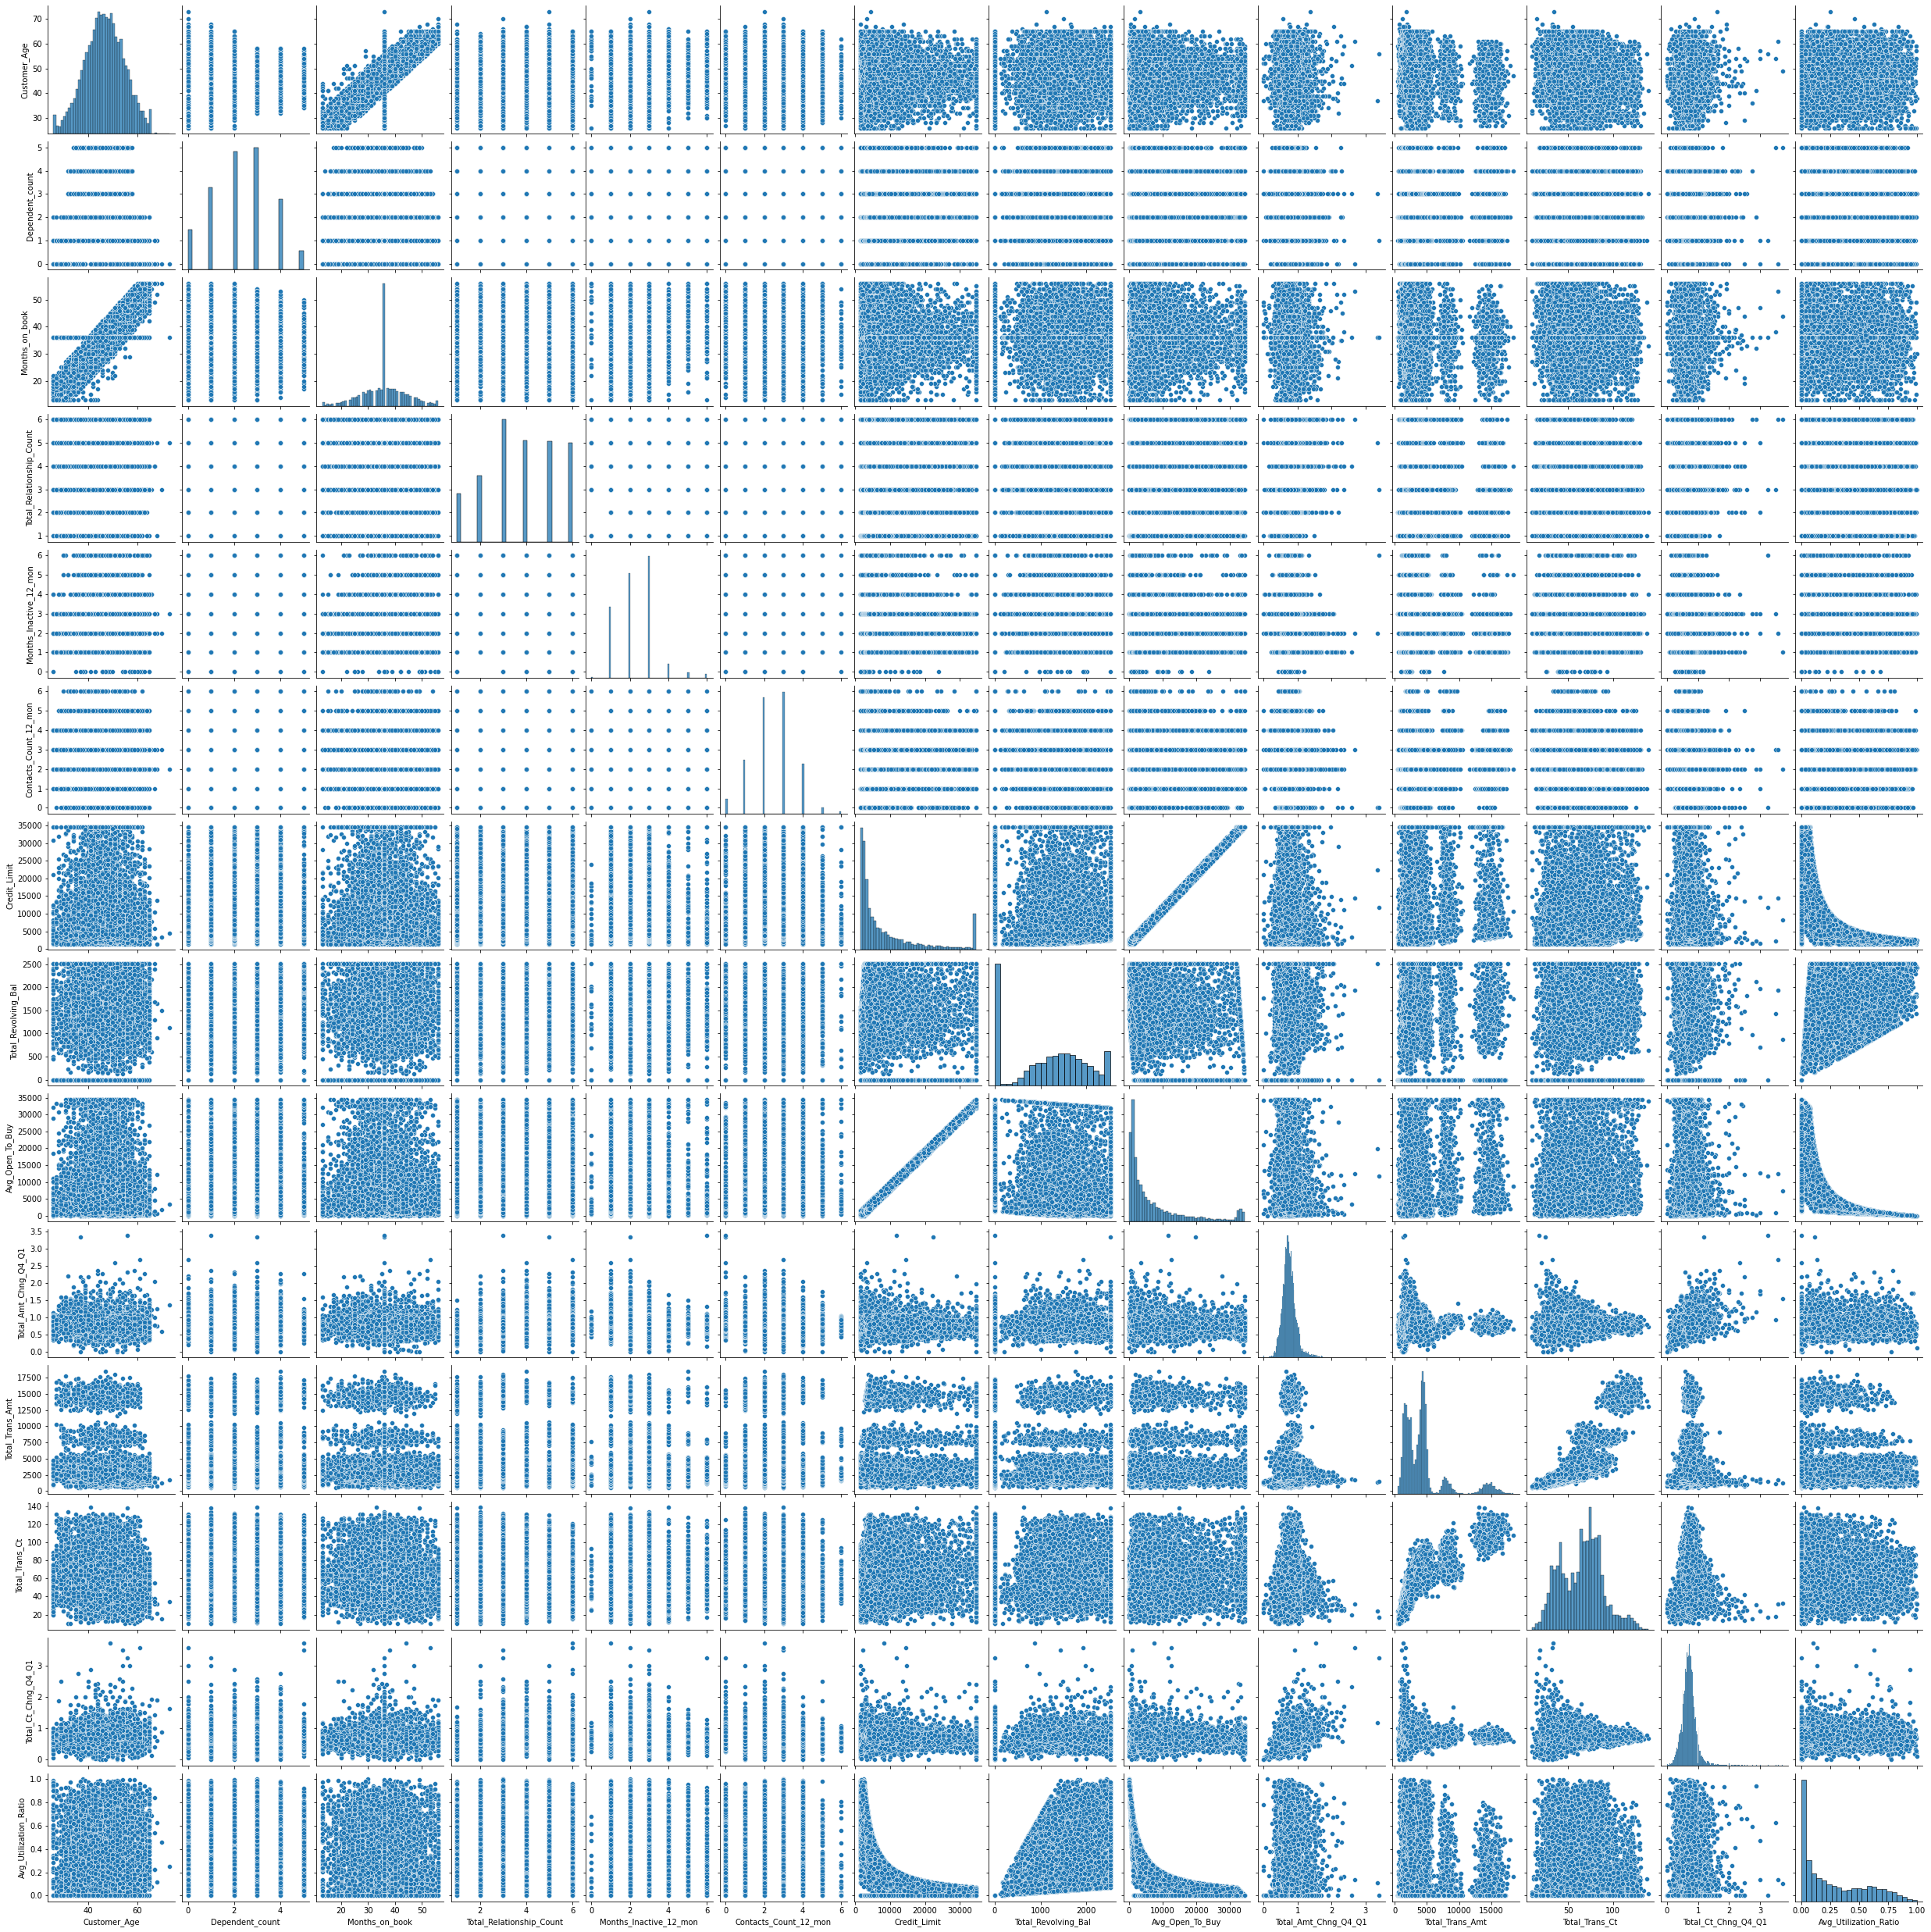

In [18]:
sns.pairplot(data=df.select_dtypes(exclude=['object']))

### Insight:

<ul>
    <li>There appears to be some data outliers based on the long right trails in some of the distributions</li>
    <li>In general, the data appears to be fairly well distributed</li>
    <li>Further analysis is required</li>
</ul>

In [19]:
# Boxplot function for EDA
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [20]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

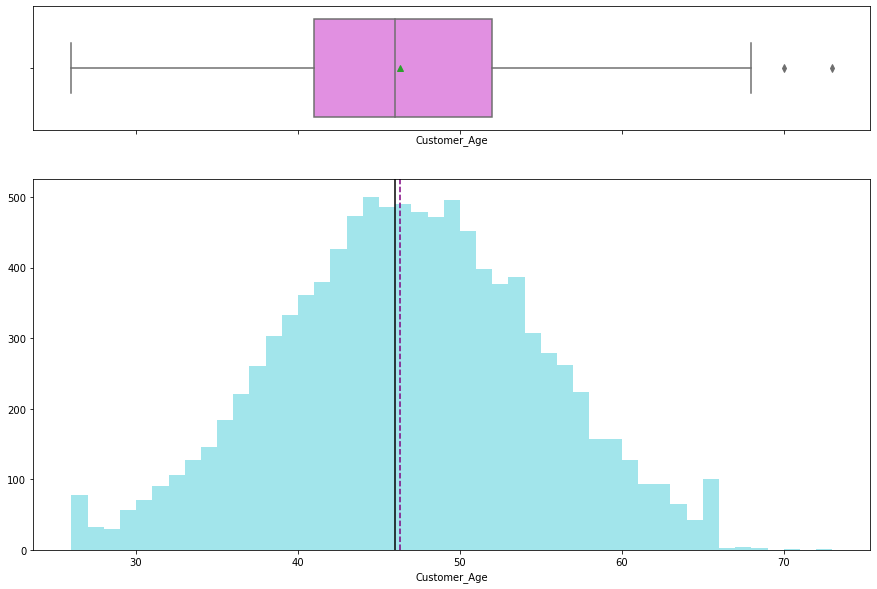

In [21]:
histogram_boxplot(df['Customer_Age'])


<ul>
    <li>The data appears to be normally distributed</li>
    <li>If anything, the data appears to skew slightly right</li>
    <li>Customers are adults, majority of which are over the age of 45</li>
</ul>

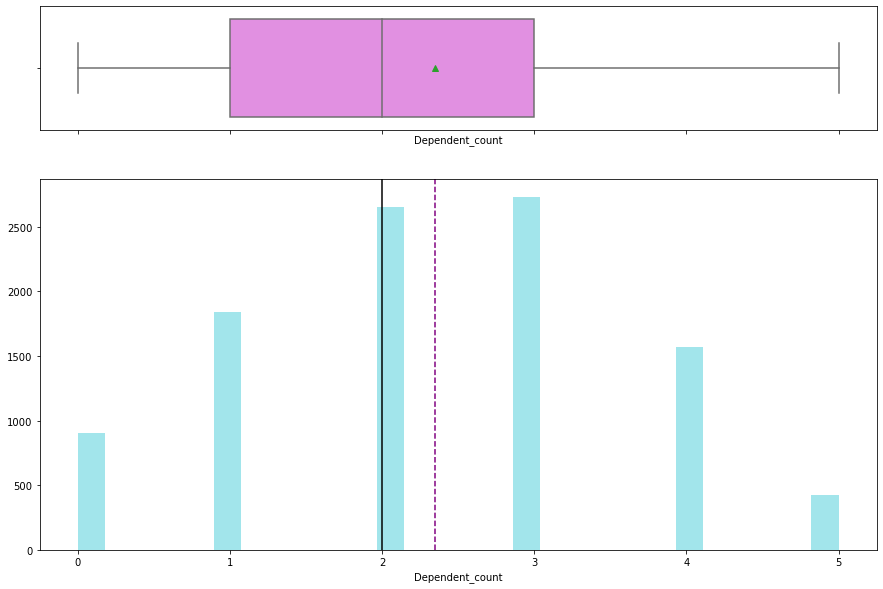

In [22]:
histogram_boxplot(df['Dependent_count'])

<ul>
    <li>Majority of customers have children</li>
    <li>This is in line with the range of ages we saw in the data</li>
</ul>

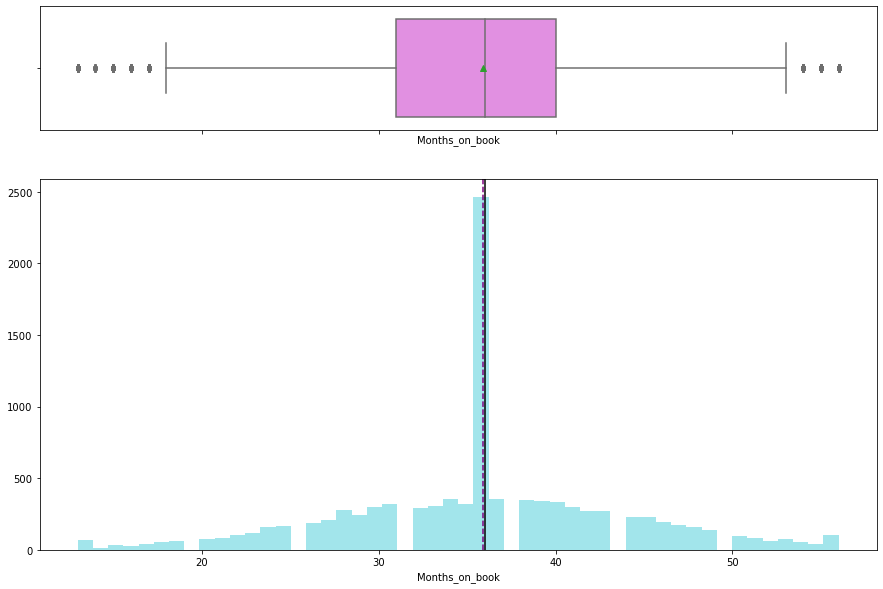

In [23]:
histogram_boxplot(df['Months_on_book'])

<ul>
    <li>The data distribution is heavily imbalanced</li>
    <li>This suggests that customers sign up for an account at approximately the same age</li>
</ul>

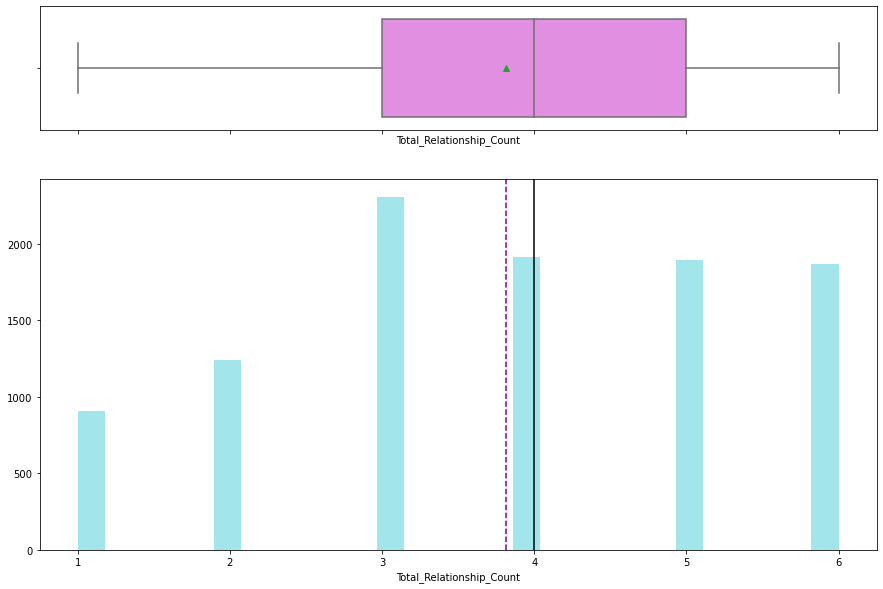

In [24]:
histogram_boxplot(df['Total_Relationship_Count'])

<ul>
    <li>This data appears to mirror the distribution depen</li>
</ul>

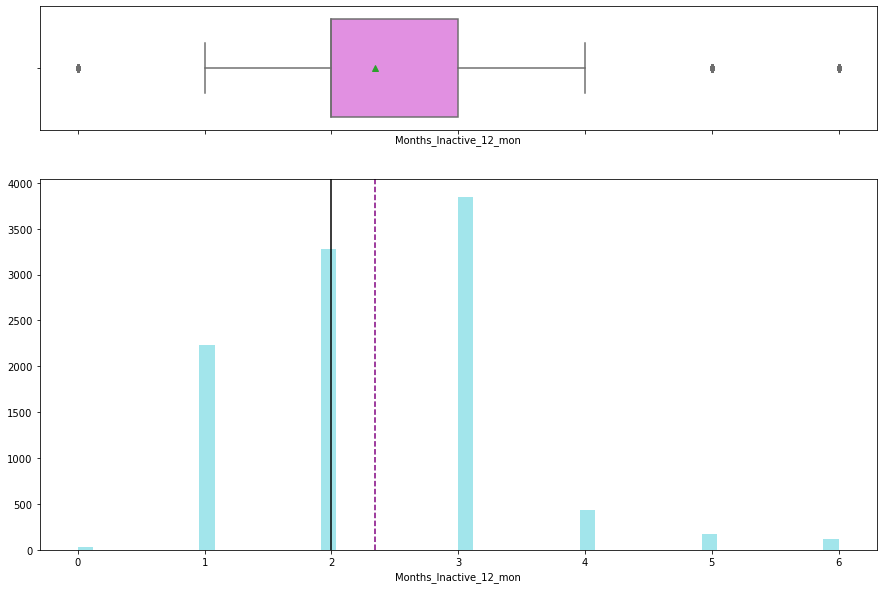

In [25]:
histogram_boxplot(df['Months_Inactive_12_mon'])

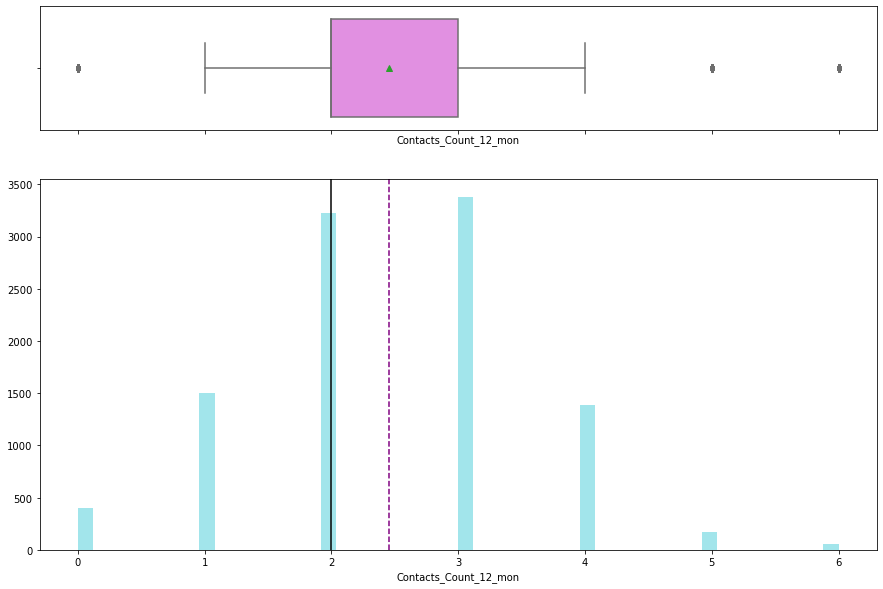

In [26]:
histogram_boxplot(df['Contacts_Count_12_mon'])

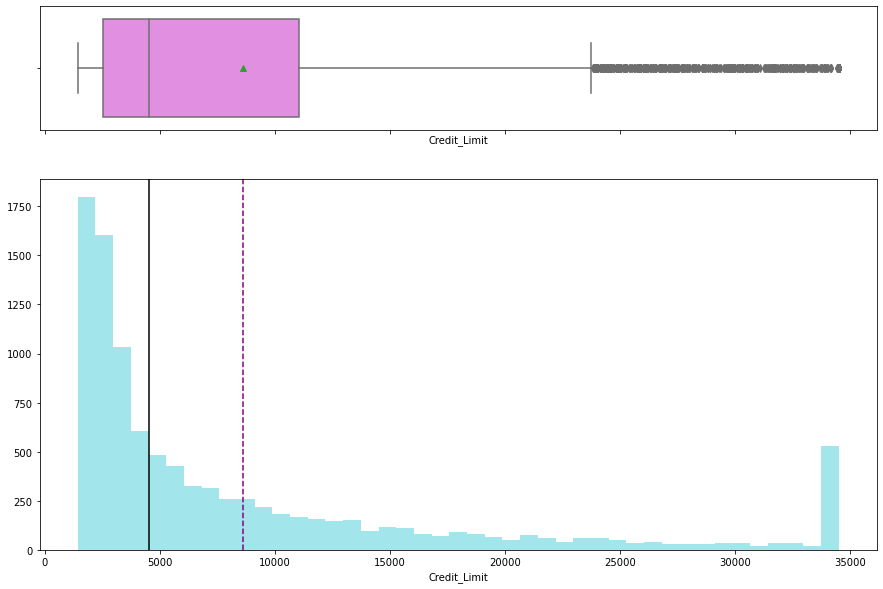

In [27]:
histogram_boxplot(df['Credit_Limit'])

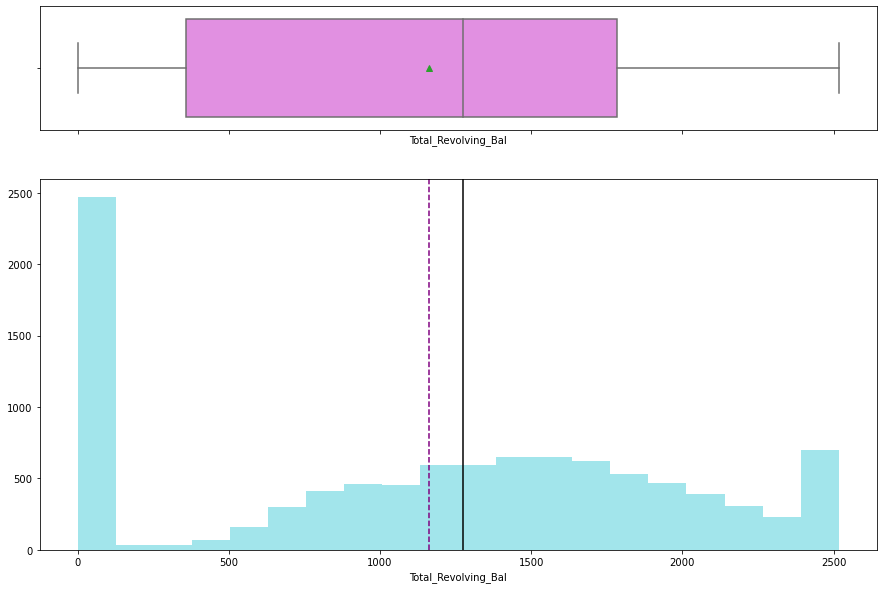

In [28]:
histogram_boxplot(df['Total_Revolving_Bal'])

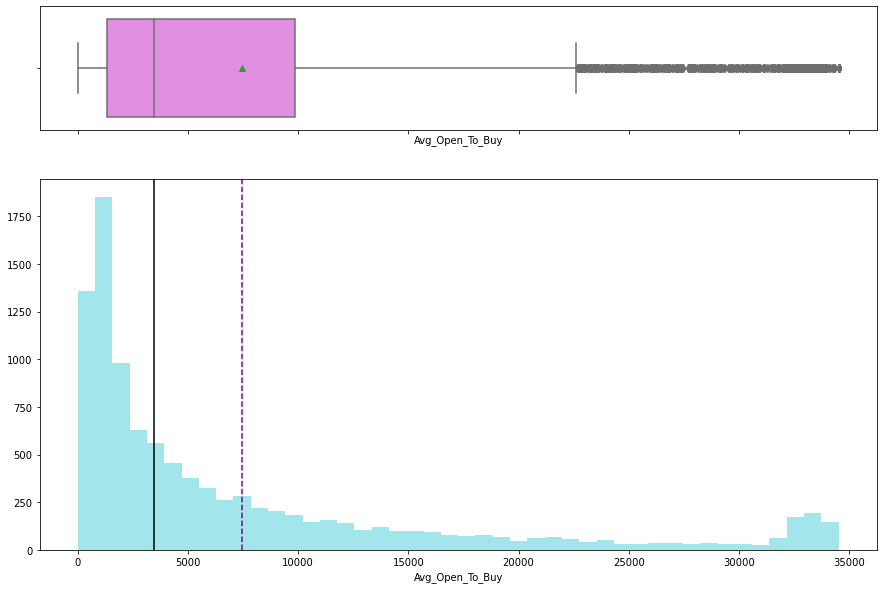

In [29]:
histogram_boxplot(df['Avg_Open_To_Buy'])

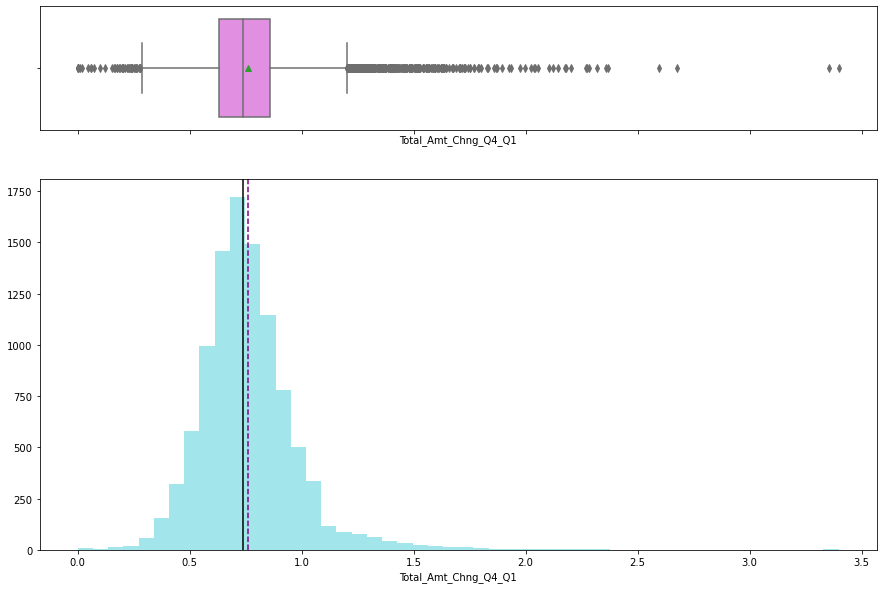

In [30]:
histogram_boxplot(df['Total_Amt_Chng_Q4_Q1'])

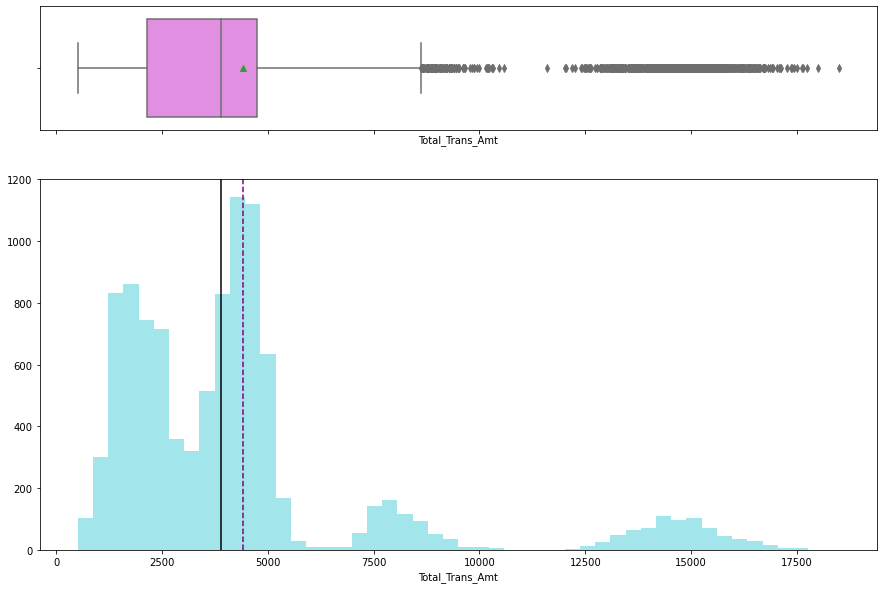

In [31]:
histogram_boxplot(df['Total_Trans_Amt'])

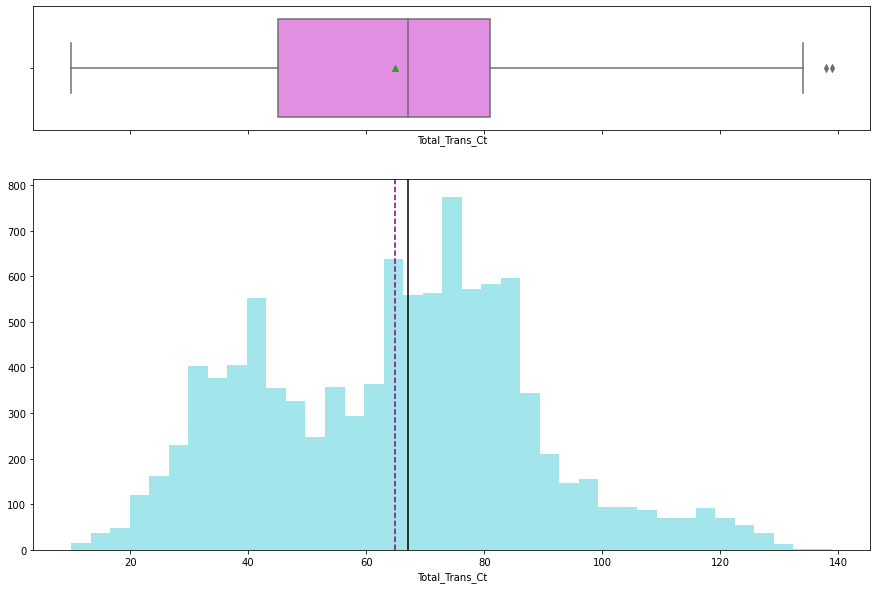

In [32]:
histogram_boxplot(df['Total_Trans_Ct'])

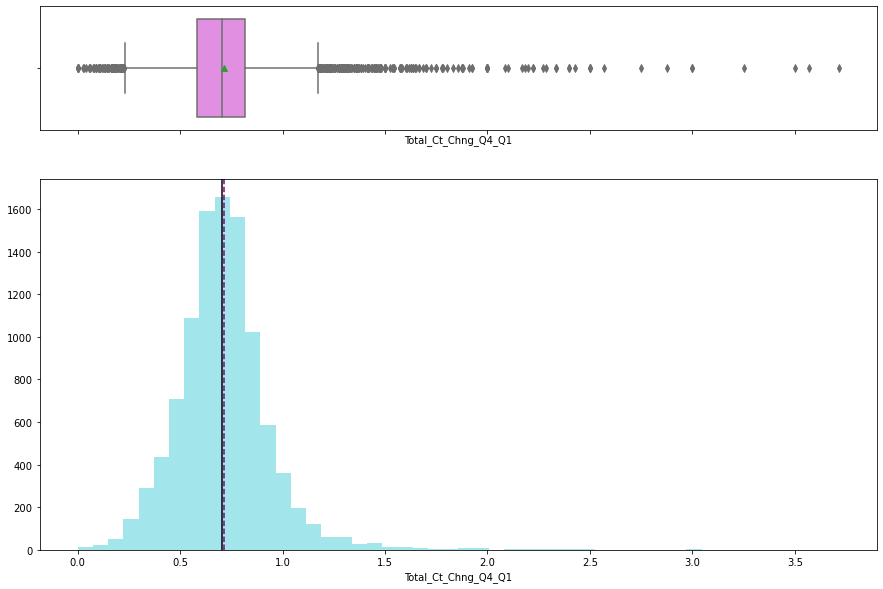

In [33]:
histogram_boxplot(df['Total_Ct_Chng_Q4_Q1'])

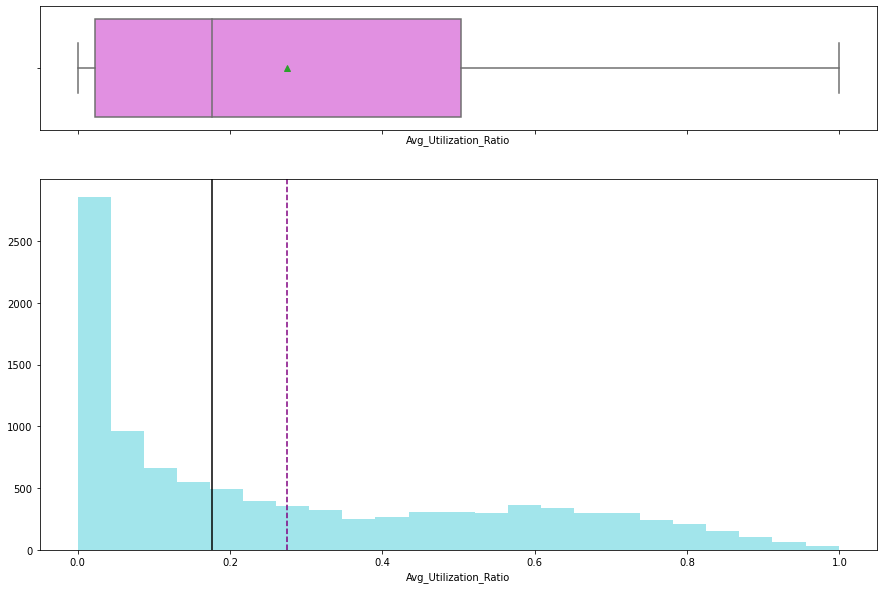

In [34]:
histogram_boxplot(df['Avg_Utilization_Ratio'])

### Outliers:

There are no statistically significant outliers that we will be droppig or dealing with.

The outliers that are present follow the same approximate distribution pattern with the rest of the data.

### Observations on Attrition Flag

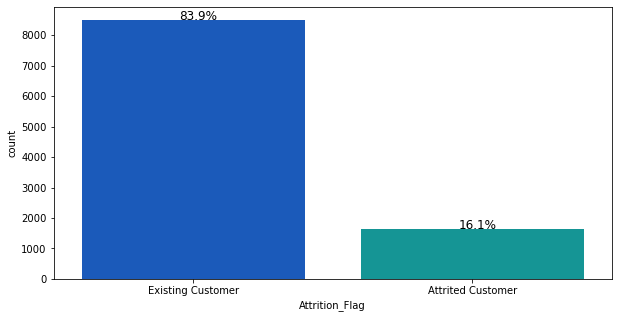

In [35]:
#Attrition Flag is our target variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Attrition_Flag"], palette="winter")
perc_on_bar(ax, df["Attrition_Flag"])



The data is imbalanced.

We will need to account for this when we build our models.

### Observations on Categorical Variables

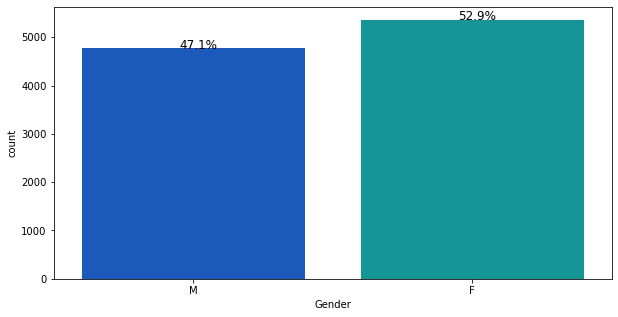

In [36]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Gender"], palette="winter")
perc_on_bar(ax, df["Gender"])

<ul>
    <li>The customers who closed their accounts skews slightly towards being female</li>
</ul>

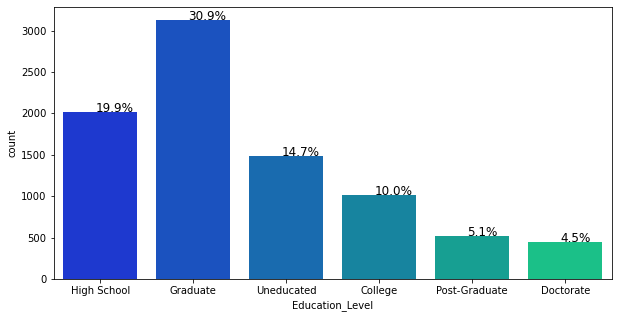

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Education_Level"], palette="winter")
perc_on_bar(ax, df["Education_Level"])

<ul>
    <li>The majority of customers are Graduates</li>
    <li>High School also represents a large percentage of customers</li>
</ul>

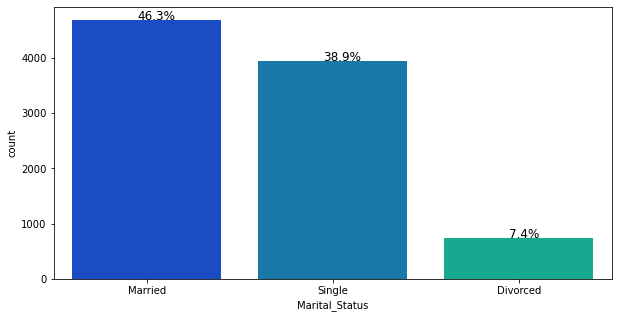

In [38]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Marital_Status"], palette="winter")
perc_on_bar(ax, df["Marital_Status"])

<ul>
    <li>Married customers represent the majority of the dataset</li>
</ul>

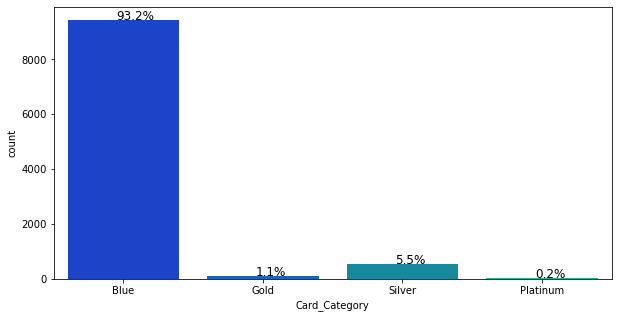

In [39]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Card_Category"], palette="winter")
perc_on_bar(ax, df["Card_Category"])

<ul>
    <li>The Blue Credit card is by far the most commong among customers</li>
    <li>Silver, Gold, Platimum cards represent an insignificant part of the dataset</li>
</ul>

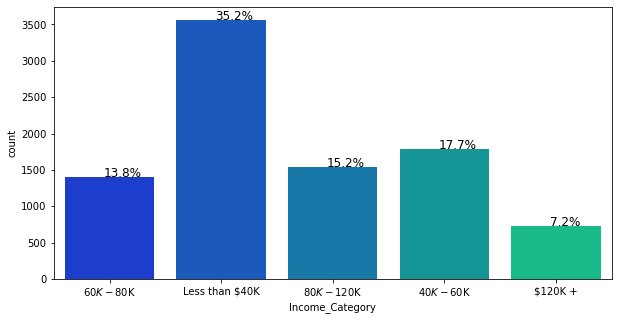

In [40]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Income_Category"], palette="winter")
perc_on_bar(ax, df["Income_Category"])

<AxesSubplot:>

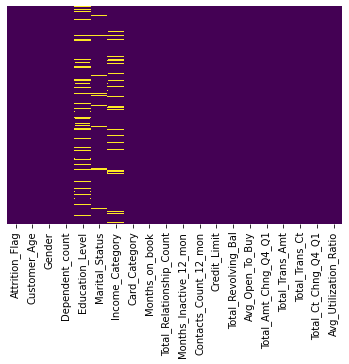

In [41]:
#Checking total missing records
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<ul>
    <li>The null values are concentrated on 3 features</li>
    <li>Majority of the null values appear in Education Level</li>
</ul>

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

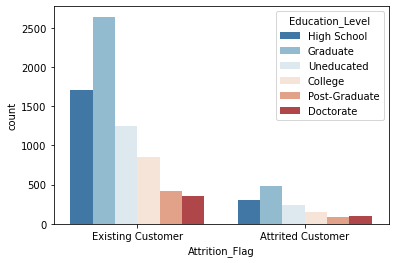

In [42]:
sns.countplot(x='Attrition_Flag', hue='Education_Level', data=df,palette='RdBu_r')

<ul>
    <li>The distribution of Education Level appears to match for both Attrition_Flag cases.</li>
</ul>

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

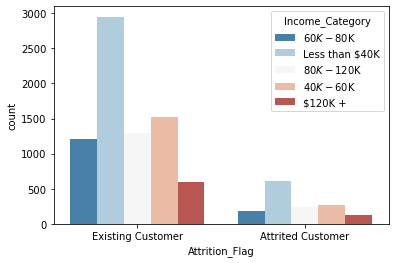

In [43]:
sns.countplot(x='Attrition_Flag', hue='Income_Category', data=df,palette='RdBu_r')

<ul>
    <li>As we saw with Education Level, the Income_category represents the data for both types of customers in the same distibution pattern</li>
</ul>

In [44]:
pd.DataFrame(data={'% of Missing Values':round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values
Education_Level                         15.00
Income_Category                         10.98
Marital_Status                           7.40
Attrition_Flag                           0.00
Credit_Limit                             0.00
Total_Ct_Chng_Q4_Q1                      0.00
Total_Trans_Ct                           0.00
Total_Trans_Amt                          0.00
Total_Amt_Chng_Q4_Q1                     0.00
Avg_Open_To_Buy                          0.00
Total_Revolving_Bal                      0.00
Months_Inactive_12_mon                   0.00
Contacts_Count_12_mon                    0.00
Customer_Age                             0.00
Total_Relationship_Count                 0.00
Months_on_book                           0.00
Card_Category                            0.00
Dependent_count                          0.00
Gender                                   0.00
Avg_Utilization_Ratio                    0.00

### Bivariate Analysis

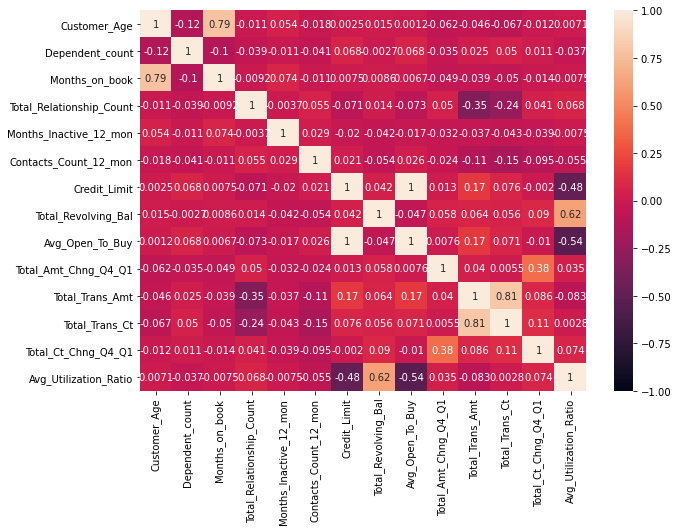

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

<ul>
    <li>Avg_Open_To_Buy & Credit_Limit have a perfect correlation. We can drop one of these features. We will drop Credit Limit, as Avg_Open_To_Buy is impacted by actions taken by the customer. Whereas Credit Limit doesn't represent customer actions. When predicting churn, we are interested in a change in behavior.</li>
    <li>Customer_Age & Months_on_book has a very strong positive correlation. Which is understandable - as the age of the customer increases, we can expect the total number of months on book to incrase. We will drop age, as total months on book better represents a customers relationship with the bank.</li>
    <li>Total_Trans_Ct and Total_Trans_Amt has a very strong positive correlation, this is due to the relationship between the two variables. As the number of transfers increase, the total amount increases. We will drop Total_Trans_Amt.</li>
    </ul>

### Data Preparation

In [46]:
#Graudate and College represent that same level of Education
df['Education_Level'].mask(df['Education_Level'] == "Graduate", "College", inplace=True)

In [47]:
#Setting categorical variabbles to "category" to improve performance of models
df["Card_Category"] = df["Card_Category"].astype("category")
df["Dependent_count"] = df["Dependent_count"].astype("category")
df["Education_Level"] = df["Education_Level"].astype("category")
df["Income_Category"] = df["Income_Category"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")
df["Total_Relationship_Count"] = df["Total_Relationship_Count"].astype("category")

In [48]:
#Mapping values to corresponding numerical values
Attrition_Flag = {'Existing Customer':0,'Attrited Customer':1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag)

Education_Level = {'Uneducated':0,'High School':1, 'College':2, 'Post-Graduate':3, 'Doctorate':4}
df['Education_Level'] = df['Education_Level'].map(Education_Level)

Marital_Status = {'Single':0,'Married':1,'Divorced': 2}
df['Marital_Status'] = df['Marital_Status'].map(Marital_Status)

Income_Category= {'Less than $40K':0, '$40K - $60K':1,'$80K - $120K':2,'$60K - $80K':3, '$120K +':4}  
df['Income_Category'] = df['Income_Category'].map(Income_Category)

Gender = {'F':0,'M':1}
df['Gender'] = df['Gender'].map(Gender)

Card_Category = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3}
df['Card_Category'] = df['Card_Category'].map(Card_Category)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Split Data

In [50]:
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

In [51]:
# Dropping aforementioned features
X.drop(
    columns=[
        "Credit_Limit",
        "Customer_Age",
        "Total_Trans_Amt",
    ],
    inplace=True,
)

In [52]:
X.head()

Gender Dependent_count Education_Level Marital_Status Income_Category  \
0      1               3               1              1               3   
1      0               5               2              0               0   
2      1               3               2              1               2   
3      0               4               1            NaN               0   
4      1               3               0              1               3   

  Card_Category  Months_on_book Total_Relationship_Count  \
0             0              39                        5   
1             0              44                        6   
2             0              36                        4   
3             0              34                        3   
4             0              21                        5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
0                       1                      3                  777   
1                       1                      2                  864   
2                       1                      0                    0   
3                       4                      1                 2517   
4                       1                      0                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0          11914.0                 1.335              42                1.625   
1           7392.0                 1.541              33                3.714   
2           3418.0                 2.594              20                2.333   
3            796.0                 1.405              20                2.333   
4           4716.0                 2.175              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [53]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


### Missing-Value Treatment

In [54]:
imputer = KNNImputer(n_neighbors=5)

In [55]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [56]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

In [57]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')


In [58]:
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Gender,'Gender')
inverse_mapping(Income_Category,'Income_Category')
inverse_mapping(Card_Category,'Card_Category')

In [59]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
College          3457
High School      1887
Uneducated       1043
Post-Graduate     389
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3646
Single      2939
Divorced     503
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2631
$40K - $60K       1569
$80K - $120K      1302
$60K - $80K       1074
$120K +            512
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [60]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
College          3457
High School      1887
Uneducated       1043
Post-Graduate     389
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3646
Single      2939
Divorced     503
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2631
$40K - $60K       1569
$80K - $120K      1302
$60K - $80K       1074
$120K +            512
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Encoding Categorical Variables

In [61]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape, X_test.shape)

(7088, 30) (3039, 30)


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dependent_count                 7088 non-null   float64
 1   Months_on_book                  7088 non-null   float64
 2   Total_Relationship_Count        7088 non-null   float64
 3   Months_Inactive_12_mon          7088 non-null   float64
 4   Contacts_Count_12_mon           7088 non-null   float64
 5   Total_Revolving_Bal             7088 non-null   float64
 6   Avg_Open_To_Buy                 7088 non-null   float64
 7   Total_Amt_Chng_Q4_Q1            7088 non-null   float64
 8   Total_Trans_Ct                  7088 non-null   float64
 9   Total_Ct_Chng_Q4_Q1             7088 non-null   float64
 10  Avg_Utilization_Ratio           7088 non-null   float64
 11  Gender_F                        7088 non-null   uint8  
 12  Gender_M                        70

### Functions

In [63]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_scorelr(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [64]:
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [65]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Performance Metrics for Business Case

We are most interested in the <b>Recall</b> score of the models we will be building.

Having a poor recall score represents the highest risk of incurring financial losses for the bank. As we get worse at predicting whether a customer will close their account, we increase the potential losses that come from losing customers.

We would rather be overly-agressive in predicting customers who are might close their accounts, as when we are wrong and predict a customer will close their account - but don't. We only incur the expense of efforts made to prevent them from closing their account.

I would assume these expenses are minimal when compared to the potential financial losses from losing the customer entirely.

Over time, as we learn more about how the models perform, we can assign a threshold that would better identify "at risk" customers, who may not be considered an "extreme risk" of loss.

### Logistic Regression Model

In [66]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [67]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [68]:
#Calculating different metrics
scores_LR = get_metrics_scorelr(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

Accuracy on training set :  0.8902370203160271
Accuracy on test set :  0.8848305363606449
Recall on training set :  0.48463564530289727
Recall on test set :  0.45286885245901637
Precision on training set :  0.7429340511440108
Precision on test set :  0.7269736842105263


### Insight:

The initial logistic model we fit yields decent Accuracy scores on both the training and test data sets. There is no concern for overfitting.

While the model performed relatively well on accuracy, the Recall score was not good.

The dataset is rather imbalanced, as such we will attempt to improve the Recall score by using Oversampling techniques.



### Oversampling train data using SMOTE


In [69]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 30)
After UpSampling, the shape of train_y: (11898,) 



#### Logistic Regression on oversampled data

In [70]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

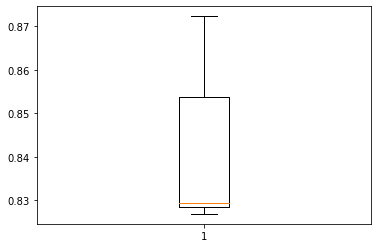

In [71]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Accuracy on training set :  0.8446797781139688
Accuracy on test set :  0.8121092464626521
Recall on training set :  0.8441754916792739
Recall on test set :  0.7192622950819673
Precision on training set :  0.8450277637556789
Precision on test set :  0.44713375796178345


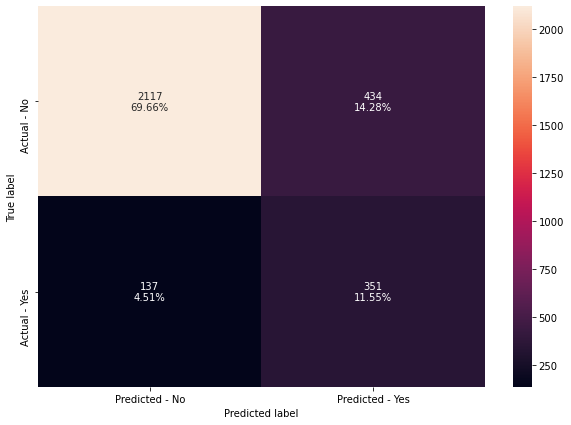

In [72]:
#Calculating different metrics
get_metrics_scorelr(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

### Insight: 

When compared to the original logistic model we fit, the oversampled model performed well.

We wanted to improve the Recall score and that is just what happened.

The improvement in Recall came at the cost of precision, which we do not mind as we are primarily interested the Recall performance of the models.

We will undersample the data using SMOTE on the next logistic model to further attempt to improve the Recall & overall performance of the logistic model.

### Undersampling train data using SMOTE

In [73]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [74]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 30)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [75]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

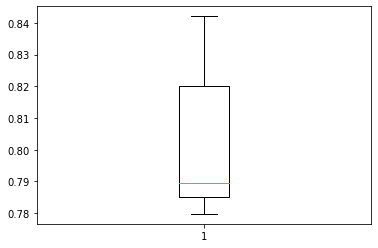

In [76]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.8064091308165057
Accuracy on test set :  0.8051990786442909
Recall on training set :  0.8024582967515365
Recall on test set :  0.7807377049180327
Precision on training set :  0.8088495575221238
Precision on test set :  0.4399538106235566


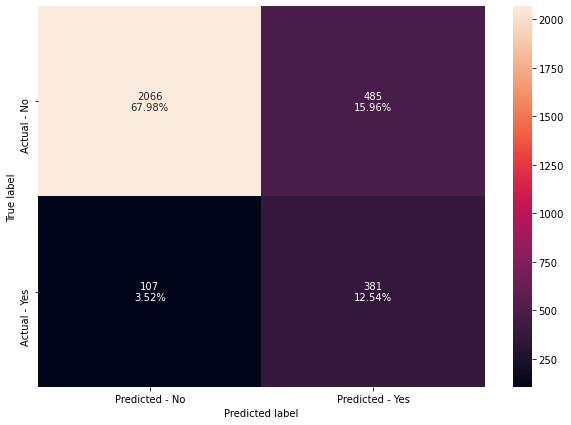

In [77]:
#Calculating different metrics
get_metrics_scorelr(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

### Insight:

The undersampled model performed well. However, we did not see an improvement in Recall, and we do see some detetoriation in the performance of the model.

As a final measure to account for discrepancies in the data, we will build a Logistic model with regularized data.


### Regularization

In [78]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='liblinear')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1), 
              'class_weight': ['balanced'],}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, class_weight='balanced', random_state=1,
                   solver='liblinear')

Accuracy on training set :  0.9196503614052782
Accuracy on test set :  0.8798947022046726
Recall on training set :  0.8977979492351655
Recall on test set :  0.569672131147541
Precision on training set :  0.9388293197398488
Precision on test set :  0.6420323325635104


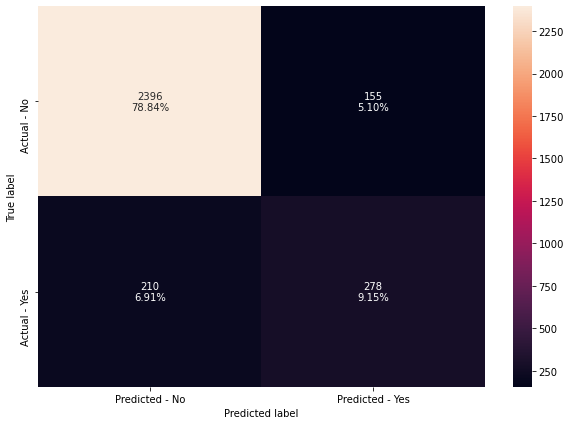

In [79]:
#Calculating different metrics
get_metrics_scorelr(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

### Insight:

The model performed well on the training set but terribly on the test set.

This would suggest that the model is overfitting the training set.

Overall the Logistic models performed poorly.


### Ridge & Lasso

In [80]:
#Fitting a simple linear model

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [81]:
#Fitting a Ridge model
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    



Ridge model: [ 9.69783522e-03 -1.96103407e-04 -5.44829034e-02  4.13204179e-02
  4.28800299e-02 -7.96856169e-05 -1.20055017e-06 -3.44015029e-02
 -6.15822258e-03 -2.80482158e-01 -7.52431824e-02  1.79657260e-02
 -1.79657260e-02 -2.04918916e-02  1.24168213e-02 -1.07256522e-02
  3.00669406e-02 -1.12662181e-02  3.19022192e-03 -1.89433816e-02
  1.57531596e-02  1.14161354e-02 -7.27294863e-03 -1.83065981e-02
  7.54040580e-06  1.41558709e-02 -8.86266532e-02  1.73859755e-02
  1.11272569e-01 -4.00318908e-02]


In [82]:
#Fitting a Lasso model
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.14274115e-04  3.59721698e-07 -0.00000000e+00
 -5.30139265e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [83]:
#Comparing the results

print("Linear Model")
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
print('*'*30)
print("Ridge Model")
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print('*'*30)
print("Lasso Model")
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))




Linear Model
0.34561798250201425
0.3298908875686102
******************************
Ridge Model
0.3456178747045794
0.3298950759473318
******************************
Lasso Model
0.20529092560345252
0.17592862269428455


### Insight:

The linear models perform terribly. The problem statement is better suited for a Logistic problem, so this is understandable.

We did not really gain any important insight into our dataset by generating linear models.

### Comparing LR Models

In [84]:
# defining list of model
models = [lr,log_reg_over, lr_estimator,log_reg_under]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_scorelr(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [85]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.890237   
1            Logistic Regression on Oversampled data        0.830982   
2  Logistic Regression-Regularized (Oversampled d...        0.888826   
3           Logistic Regression on Undersampled data        0.819272   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.884831      0.484636     0.452869         0.742934        0.726974  
1       0.812109      0.756804     0.719262         0.483455        0.447134  
2       0.879895      0.613696     0.569672         0.667622        0.642032  
3       0.805199      0.802458     0.780738         0.463959        0.439954

### Performance Review:

Excluding the incredibly poor performing linear models, the logistic regression models peformed relatively well overall.

There is no concern for the models overfitting apart from the logistic model trained on regularized data.

However, the Recall on the training set performance was not good.

When we undersampled the data, we had our best performing model based on the Recall score.

There is a lot of room for improvement. I don't believe the simple logistic models are well suited to our business case.

### Finding the Coefficiants

In [86]:
log_odds = lr.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])

coef
Dependent_count                 0.154452
Months_on_book                  0.015015
Total_Relationship_Count       -0.417024
Months_Inactive_12_mon          0.566218
Contacts_Count_12_mon           0.650724
Total_Revolving_Bal            -0.000929
Avg_Open_To_Buy                 0.000010
Total_Amt_Chng_Q4_Q1           -0.034812
Total_Trans_Ct                 -0.063606
Total_Ct_Chng_Q4_Q1            -0.222989
Avg_Utilization_Ratio          -0.002514
Gender_F                        0.220746
Gender_M                       -0.108890
Education_Level_College        -0.004253
Education_Level_Doctorate       0.030268
Education_Level_High School     0.021916
Education_Level_Post-Graduate   0.049227
Education_Level_Uneducated      0.014696
Marital_Status_Divorced         0.015409
Marital_Status_Married         -0.092304
Marital_Status_Single           0.188750
Income_Category_$120K +         0.002367
Income_Category_$40K - $60K     0.012837
Income_Category_$60K - $80K    -0.065793
Income_Category_$80K - $120K   -0.023675
Income_Category_Less than $40K  0.186120
Card_Category_Blue              0.063027
Card_Category_Gold              0.015187
Card_Category_Platinum          0.008585
Card_Category_Silver            0.025056

### Converting coefficients to odds

In [87]:
odds = np.exp(np.abs(lr.coef_[0]))-1
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train_un.columns, columns=['Change in odds'])

Change in odds
Dependent_count                       0.167018
Months_on_book                        0.015128
Total_Relationship_Count              0.517439
Months_Inactive_12_mon                0.761592
Contacts_Count_12_mon                 0.916929
Total_Revolving_Bal                   0.000929
Avg_Open_To_Buy                       0.000010
Total_Amt_Chng_Q4_Q1                  0.035425
Total_Trans_Ct                        0.065672
Total_Ct_Chng_Q4_Q1                   0.249807
Avg_Utilization_Ratio                 0.002517
Gender_F                              0.247007
Gender_M                              0.115040
Education_Level_College               0.004262
Education_Level_Doctorate             0.030731
Education_Level_High School           0.022158
Education_Level_Post-Graduate         0.050459
Education_Level_Uneducated            0.014805
Marital_Status_Divorced               0.015529
Marital_Status_Married                0.096698
Marital_Status_Single                 0.207739
Income_Category_$120K +               0.002369
Income_Category_$40K - $60K           0.012920
Income_Category_$60K - $80K           0.068006
Income_Category_$80K - $120K          0.023958
Income_Category_Less than $40K        0.204567
Card_Category_Blue                    0.065056
Card_Category_Gold                    0.015303
Card_Category_Platinum                0.008622
Card_Category_Silver                  0.025373

### Insight:

<b>Contacts_Count_12_mon</b> is the most important feature. As the number of contacts a customer makes in the last 12 month changes, the probability of the customer closing their account changes far more than when compared with any other feature. The bank should take note of this, as it is an excellent candidate to be tracked more. Efforts can be made to directly impact a customers behaviour towards the bank.

<b>Months_Inactive_12_mon</b> is the second most important feature to take into consideration. The hypothesis that as the customer continues to be inactive over time, the higher the likelihood of them closing their account can be proven through measuring the affect of change in Months Inactive. I would assume as the customer becomes more inactive, the probability of them closing their account increases.

<b>Total_Ct_Chng_Q4_Q1</b> vs <b>Total_Amt_Chng_Q4_Q1</b>. Interestingly enough, these two variables represent the same behavioral change in a customers relationship with the bank. However, the Total Count matters more to the model than the Total Amount of change during the quarters. Therefore, it matters more how many times a customer makes a transaction than it does the amount of the transaction.

When considering a customer profile, their relationship status being <b>Single</b> has a greater affect on the probability on the customer closing their account than any other marital status. As well as the following customer profile features: <ul>
    <li>Income Category: Less than $40K</li>
    <li>Education: Post-Graduate</li>
    <li>Card Category: Blue</li>
</ul>        

#### Conclusion:

The features that measure customer behaviour/use of their account are far more important in predicting whether a customer will close their account or not. The features that are focused on their profile or financial strength have little importance. However, they are useful in generating a profile of customers.

I would recommend the business focus on the change in behavior, instead of the profile of customers.

### Model building - Bagging and Boosting

In [88]:
#Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models

models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "BAG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_estimator", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 67.16709173815596
RF: 65.056805008115
BAG: 65.93167941881134
GBM: 69.6224592317799
ADB: 69.8013756859108
XGB: 74.10000772857252


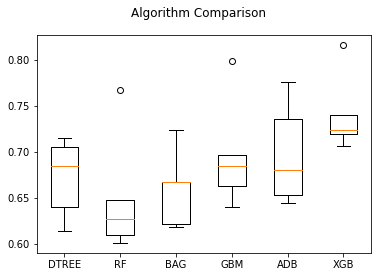

In [89]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Hyperparameter tuning using grid search

The models we will build are:
<ul>
    <li>GradientBoosting Model</li>
    <li>AdaBoost</li>
    <li>XGBoost</li>
</ul>
They have been selected as they performed best on the cross validation score.

## Gradient Boosting Model

In [90]:
#Time Performance list

time_perf = {}

import time
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   return("{0:02d}:{1:02d}:{2:02d}".format(h, m, s))



In [91]:
X_train.head()

Dependent_count  Months_on_book  Total_Relationship_Count  \
0              1.0            43.0                       6.0   
1              0.0            36.0                       3.0   
2              0.0            13.0                       6.0   
3              0.0            55.0                       3.0   
4              3.0            35.0                       6.0   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
0                     1.0                    2.0                  0.0   
1                     3.0                    2.0               2499.0   
2                     3.0                    4.0               1101.0   
3                     3.0                    0.0                  0.0   
4                     3.0                    4.0                  0.0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0           7985.0                 1.032            72.0                0.674   
1           2945.0                 0.468            80.0                0.667   
2            542.0                 0.713            50.0                0.471   
3           2022.0                 0.579            65.0                0.548   
4           4930.0                 1.019            77.0                0.638   

   ...  Marital_Status_Single  Income_Category_$120K +  \
0  ...                      0                        0   
1  ...                      0                        0   
2  ...                      1                        0   
3  ...                      1                        0   
4  ...                      1                        0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            1                            0   
1                            0                            1   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               1   
4                             1                               0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 30 columns]

### GridSearchCV

In [92]:
start = time.time()

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample": [0.8,0.9,1],
    "gradientboostingclassifier__max_features": [0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

end = time.time()
tp = exec_time(start,end)

print(tp)


Best Parameters:{'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 0.8} 
Score: 0.7401615271659324
00:03:18


In [93]:
time_perf.update({'gbm_tuned1': tp})

In [94]:
# Creating new pipeline with best parameters
gbm_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,
        subsample=0.8,
        n_estimators=250,
        max_features=0.7,
    ),
)

# Fit the model on training data
gbm_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.7, n_estimators=250,
                                            random_state=1, subsample=0.8))])

Accuracy on training set :  0.9634593679458239
Accuracy on test set :  0.9348469891411648
Recall on training set :  0.8384547848990342
Recall on test set :  0.7192622950819673
Precision on training set :  0.9271844660194175
Precision on test set :  0.8519417475728155


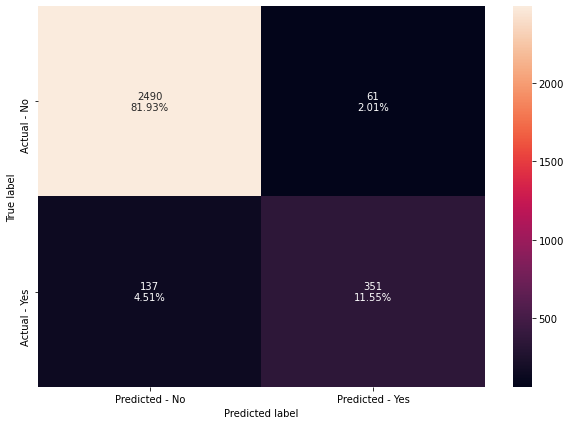

In [95]:
# Calculating different metrics
get_metrics_score(gbm_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned1, y_test)

### RandomizedSearchCV

In [96]:
start = time.time()

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {    
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample": [0.8,0.9,1],
    "gradientboostingclassifier__max_features": [0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

end = time.time()
tp = exec_time(start,end)

print(tp)


Best parameters are {'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.8} with CV score=0.739303655614808:
00:01:30


In [97]:
time_perf.update({'gbm_tuned2': tp})

In [98]:
# Creating new pipeline with best parameters
gbm_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,
        subsample=0.9,
        n_estimators=250,
        max_features=0.8,
    ),
)

# Fit the model on training data
gbm_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=250,
                                            random_state=1, subsample=0.9))])

Accuracy on training set :  0.9623306997742663
Accuracy on test set :  0.9345179335307667
Recall on training set :  0.8340649692712906
Recall on test set :  0.7213114754098361
Precision on training set :  0.9241245136186771
Precision on test set :  0.8481927710843373


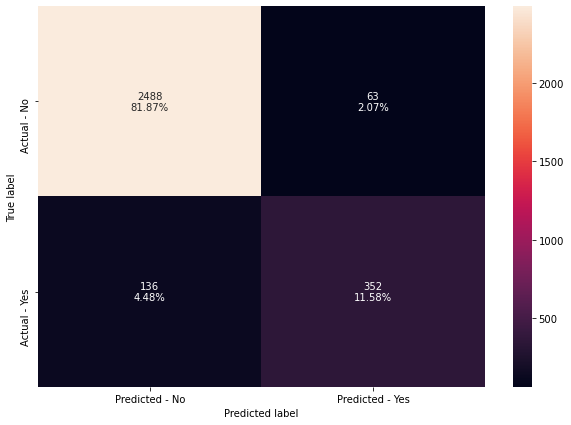

In [99]:
# Calculating different metrics
get_metrics_score(gbm_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned2, y_test)



### GridSearchCV Results
<ul>
    <li>Accuracy on training set :  0.9634593679458239</li>
    <li>Accuracy on test set :  0.9348469891411648</li>
    <li>Recall on training set :  0.8384547848990342</li>
    <li>Recall on test set :  0.7192622950819673</li>
    <li>Precision on training set :  0.9271844660194175</li>
    <li>Precision on test set :  0.8519417475728155</li>
    <li>Time Performance :  00:03:19</li>
</ul>

### RandomizedSearchCV Results
<ul>
    <li>Accuracy on training set :  0.9623306997742663</li>
    <li>Accuracy on test set :  0.9345179335307667</li>
    <li>Recall on training set :  0.8340649692712906</li>
    <li>Recall on test set :  0.7213114754098361</li>
    <li>Precision on training set :  0.9241245136186771</li>
    <li>Precision on test set :  0.8481927710843373</li>
    <li>Time Performance :  00:01:30</li>
</ul>

### Observations
Much like with the GridSearch results, at first glance the model appeared to be overfitting the training data, but the performance is carried over to the test set. But as we observed, we don't consider the model to be overfitted.

#### Recall
<ul>
    <li>GridSearchCV: 0.7192622950819673</li>
    <li>RandomizedSearchCV: 0.7213114754098361</li>
</ul>


The recall performance mirrors the original GridSearch results.

#### Precision
<ul>
    <li>GridSearchCV: 0.8519417475728155</li>
    <li>RandomizedSearchCV: 0.8481927710843373</li>
</ul>
The precision peformance also mirrors the results from the first GridSearch.

#### Time Performance
<ul>
    <li>GridSearchCV: 00:03:19</li>
    <li>RandomizedSearchCV: 00:01:30</li>
</ul>

Improvement of <b>~2 minutes</b>

### Conclusion:

Taking into consideration there was no loss in performance of the model, and a gain of ~2minutes in time performance. The RandomizedSearchCV is the better of the two approaches.

## XGBoost

### GridSearchCV

In [100]:
start = time.time()


# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss", verbosity=0)
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)


end = time.time()
tp = exec_time(start,end)

print(tp)


Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9069711724244532:
00:38:50


In [101]:
time_perf.update({'xgb_tuned1': tp})

In [102]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=150,
        scale_pos_weight=10,
        subsample=0.8,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=20, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8817720090293454
Accuracy on test set :  0.8657453109575518
Recall on training set :  0.9736611062335382
Recall on test set :  0.9077868852459017
Precision on training set :  0.5785080855503391
Precision on test set :  0.5496277915632755


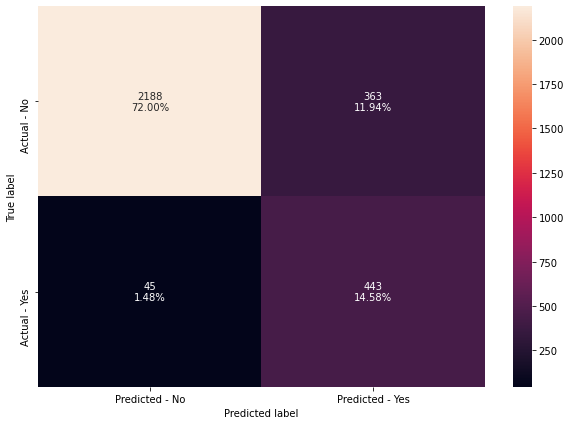

In [103]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### RandomizedSearchCV

In [104]:
start = time.time()

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1, verbosity=0))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

end = time.time()
tp = exec_time(start,end)

print(tp)


Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=0.9008153644021949:
00:01:08


In [105]:
time_perf.update({'xgb_tuned2': tp})

In [106]:
#I am aware that the following hyper parameters are not the same as the "best parameters" from the RandomizedSearchCV above.
#These hyper parameters were from a previous RandomizedSearchCV and currently yield better performance results

# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                verbosity=0,
                n_estimators=50,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=5,
                subsample=0.8,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=20, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=0))])

Accuracy on training set :  0.9005361173814899
Accuracy on test set :  0.8821980914774596
Recall on training set :  0.9824407374890255
Recall on test set :  0.9077868852459017
Precision on training set :  0.6202882483370288
Precision on test set :  0.5859788359788359


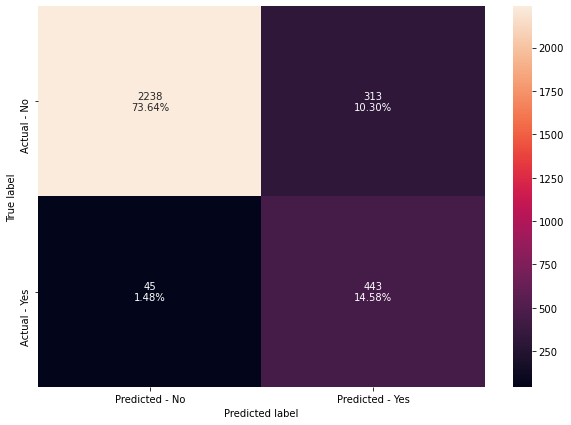

In [107]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

### GridSearchCV Results
<ul>
    <li>Accuracy on training set :  0.8817720090293454</li>
    <li>Accuracy on test set :  0.8657453109575518</li>
    <li>Recall on training set :  0.9736611062335382</li>
    <li>Recall on test set :  0.9077868852459017</li>
    <li>Precision on training set :  0.5785080855503391</li>
    <li>Precision on test set :  0.5496277915632755</li>
    <li>Time Performance: 00:40:57</li>

</ul>

### RandomizedSearchCV Results


<ul>
    <li>Accuracy on training set :  0.9005361173814899</li>
    <li>Accuracy on test set :  0.8821980914774596</li>
    <li>Recall on training set :  0.9824407374890255</li>
    <li>Recall on test set :  0.9077868852459017</li>
    <li>Precision on training set :  0.6202882483370288</li>
    <li>Precision on test set :  0.5859788359788359</li>
    <li>Time Performance :  00:01:14</li>
</ul>



### Observations

The accuracy scores for both searchcv methods are in line with one another. While the RandomizedSearch does perform slightly better. It is almost insignificant of a change.

#### Recall
<ul>
    <li>GridSearchCV: 0.9077868852459017</li>
    <li>RandomizedSearchCV: 0.9077868852459017</li>
</ul>

There is no notable improvement in Recall score between the different hyper paramaters identified.

#### Precision
<ul>
    <li>GridSearchCV: 0.5496277915632755</li>
    <li>RandomizedSearchCV: 0.5859788359788359</li>
</ul>

Both methods perform poorly on precision. However, there is a notable improvement in the RandomizedSearchCV.

#### Time Performance
<ul>
    <li>GridSearchCV: 00:41:38</li>
    <li>RandomizedSearchCV: 00:01:14</li>
</ul>

Improvement of <b>~40 minutes</b>

### Conclusion:

Taking into consideration there was no loss in performance of the model, and a gain of ~40 minutes in time performance. The RandomizedSearchCV is the better of the two approaches by a large margin.


## AdaBoost

### GridSearchCV

In [108]:
start = time.time()

#Gradient Boosting Model

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

end = time.time()
tp = exec_time(start,end)

print(tp)


Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 50} 
Score: 0.7418811345544478
00:04:38


In [109]:
time_perf.update({'adb_tuned1': tp})

In [110]:
# Creating new pipeline with best parameters
adb_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=50,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, random_state=1))])

Accuracy on training set :  0.948645598194131
Accuracy on test set :  0.9236590983876275
Recall on training set :  0.8015803336259877
Recall on test set :  0.7090163934426229
Precision on training set :  0.8686964795432921
Precision on test set :  0.7935779816513762


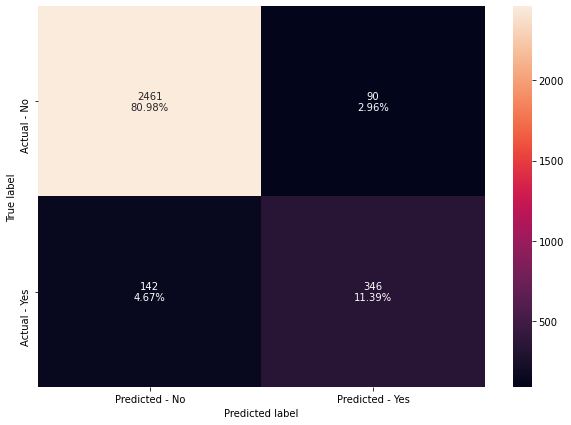

In [111]:
# Calculating different metrics
get_metrics_score(adb_tuned1)

# Creating confusion matrix
make_confusion_matrix(adb_tuned1, y_test)

### RandomizedSearchCV

In [112]:
start = time.time()

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

end = time.time()
tp = exec_time(start,end)

print(tp)


Best parameters are {'adaboostclassifier__n_estimators': 50, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7418811345544478:
00:01:37


In [113]:
time_perf.update({'adb_tuned2': tp})

In [114]:
# Creating new pipeline with best parameters
adb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "ADB",
           AdaBoostClassifier(
                base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
                n_estimators=50,
                learning_rate=1,
                random_state=1,
            ),
        ),
    ]
)
# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ADB',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, random_state=1))])

Accuracy on training set :  0.948645598194131
Accuracy on test set :  0.9236590983876275
Recall on training set :  0.8015803336259877
Recall on test set :  0.7090163934426229
Precision on training set :  0.8686964795432921
Precision on test set :  0.7935779816513762


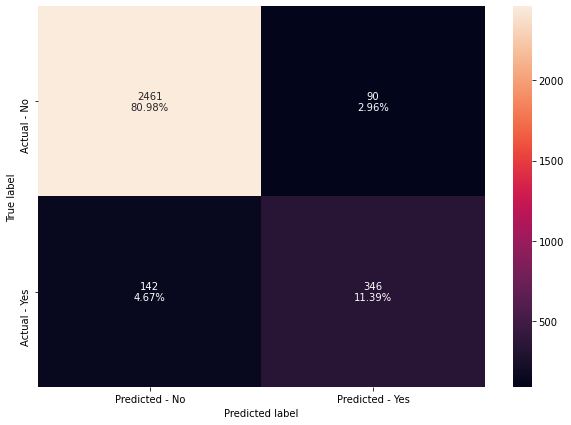

In [115]:
# Calculating different metrics
get_metrics_score(adb_tuned2)

# Creating confusion matrix
make_confusion_matrix(adb_tuned2, y_test)

### GridSearchCV Results
<ul>
    <li>Accuracy on training set :  0.948645598194131</li>
    <li>Accuracy on test set :  0.9236590983876275</li>
    <li>Recall on training set :  0.8015803336259877</li>
    <li>Recall on test set :  0.7090163934426229</li>
    <li>Precision on training set :  0.8686964795432921</li>
    <li>Precision on test set :  0.7935779816513762</li>
    <li>Time Performance: 00:04:45</li>

</ul>

### RandomizedSearchCV Results

<ul>
    <li>Accuracy on training set :  0.948645598194131</li>
    <li>Accuracy on test set :  0.9236590983876275</li>
    <li>Recall on training set :  0.8015803336259877</li>
    <li>Recall on test set :  0.7090163934426229</li>
    <li>Precision on training set :  0.8686964795432921</li>
    <li>Precision on test set :  0.7935779816513762</li>
    <li>Time Performance :  00:01:40</li>
</ul>



### Observations

The accuracy scores for both searchcv methods are in line with one another. While the RandomizedSearch does perform slightly better. It is almost insignificant of a change.

#### Recall
<ul>
    <li>GridSearchCV: 0.7090163934426229</li>
    <li>RandomizedSearchCV: 0.7090163934426229</li>
</ul>

The scores remained the same, this implies that both methods yielded the same hyper parameters for the model.

#### Precision
<ul>
    <li>GridSearchCV: 0.7935779816513762</li>
    <li>RandomizedSearchCV: 0.7935779816513762</li>
</ul>

As we observed above, the model performs the same with the identified hyper parameters. 

#### Time Performance
<ul>
    <li>GridSearchCV: 00:41:38</li>
    <li>RandomizedSearchCV: 00:01:14</li>
</ul>

Improvement of <b>~25 seconds</b>

### Conclusion:

Both cross validation methos yielded the same hyper parameters. As such, there is not much to be said about improvements between models as far as Recall is concerned. However, there is an improved time performance, albeit small, for the RandomizedSearchCV.

## Model & Pipeline Performance Review

In [116]:
# defining list of models
models = [gbm_tuned1, gbm_tuned2, xgb_tuned1, xgb_tuned2, adb_tuned1, adb_tuned2]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
perf_time = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    
    
    

In [117]:
model_names = ["gbm_tuned1", "gbm_tuned2", "xgb_tuned1", "xgb_tuned2", "adb_tuned1", "adb_tuned2"]

for i in model_names:
    perf_time.append(time_perf[i])

In [118]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Gradient Boost with GridSearchCV",
            "Gradient Boost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Time_Performance": perf_time,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
2               XGBoost with GridSearchCV        0.881772       0.865745   
3         XGBoost with RandomizedSearchCV        0.900536       0.882198   
1  Gradient Boost with RandomizedSearchCV        0.962331       0.934518   
0        Gradient Boost with GridSearchCV        0.963459       0.934847   
4              Adaboost with GridSearchCV        0.948646       0.923659   
5        Adaboost with RandomizedSearchCV        0.948646       0.923659   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision Time_Performance  
2      0.973661     0.907787         0.578508        0.549628         00:38:50  
3      0.982441     0.907787         0.620288        0.585979         00:01:08  
1      0.834065     0.721311         0.924125        0.848193         00:01:30  
0      0.838455     0.719262         0.927184        0.851942         00:03:18  
4      0.801580     0.709016         0.868696        0.793578         00:04:38  
5      0.801580     0.709016         0.868696        0.793578         00:01:37

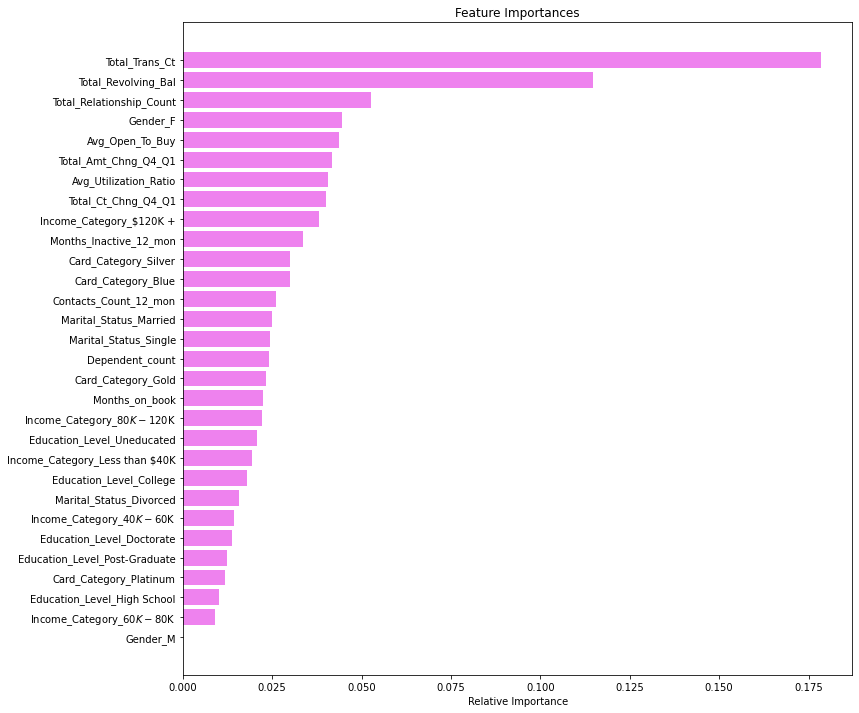

In [119]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Conclusion:

The best performing model based on our target metric - Recall is <b>XGBoost with RandomizedSearchCV</b>.

While both the GridSearchCV and RandomizedSearchCV results when being fed our trained XGBoost model performed almost exactly the same, the time performance improvement made by RandomizedSearch cannot be overlooked.

The improvement gain was exponential, and as such is our winner.

Notably, the two methods yielded slightly different hyper parameters for the XGBoost model, however the results of the model when tuned with these hyper parameters were impressive.

### Business Recommendation:

The bank is interested in identifying customers who are at risk of closing their account.

Based on the results of our tuned XGBoost model, the following two features are the most important to consider when identifying at risk customers:

<ul>
    <li>Total Transaction Count</li>
    <li>Total Revolving Balance</li>
</ul>

This would suggest that "change in behaviour" observations are far more important to identifying at risk customers, instead of relying on a general customer profile.

That being said, there is still value in identifying various customer profiles that may be a higher risk potential than others.

My reccomendation is to increase the data points related to tracking customer behaviour, and focus on building models that are better suited to identifying at risk customers, as opposed to predicting customers who would close their account based on their customer profile.